In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm

# Importing Datasets

In [3]:
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape

(730, 16)

- 730 columns and 16 rows.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- Numerical features are "temp", "atemp", "hum", "windspeed", "casual", "registered". Total = 6
- Categorical features are "season", "yr", "holiday", "mnth", "weekday", "workingday", "weathersit". Total = 7
- "dteday" is datetime feature. All the derived metrics from this variable are given in the dataset.
- "instant" is a record index for the dataset. Will be dropped.
- "casual" and "registered" are basically part of output features, may not be included in analysis.

In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Visualising the data

<Figure size 1440x864 with 0 Axes>

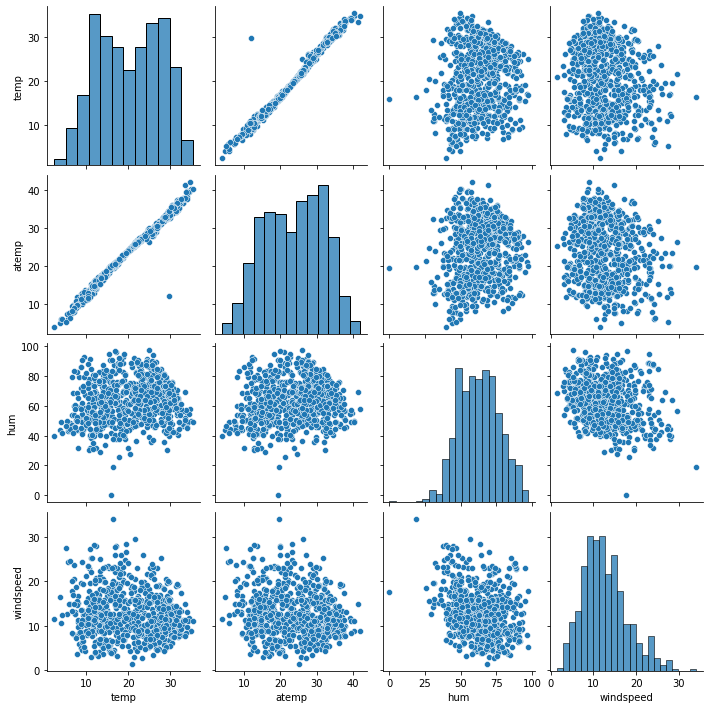

In [9]:
plt.figure(figsize = (20, 12))
sns.pairplot(df[["temp", "atemp", "hum", "windspeed"]])
plt.show()

- "cnt" have positive correlation with ["temp", "atemp", "casual", "registered"].

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

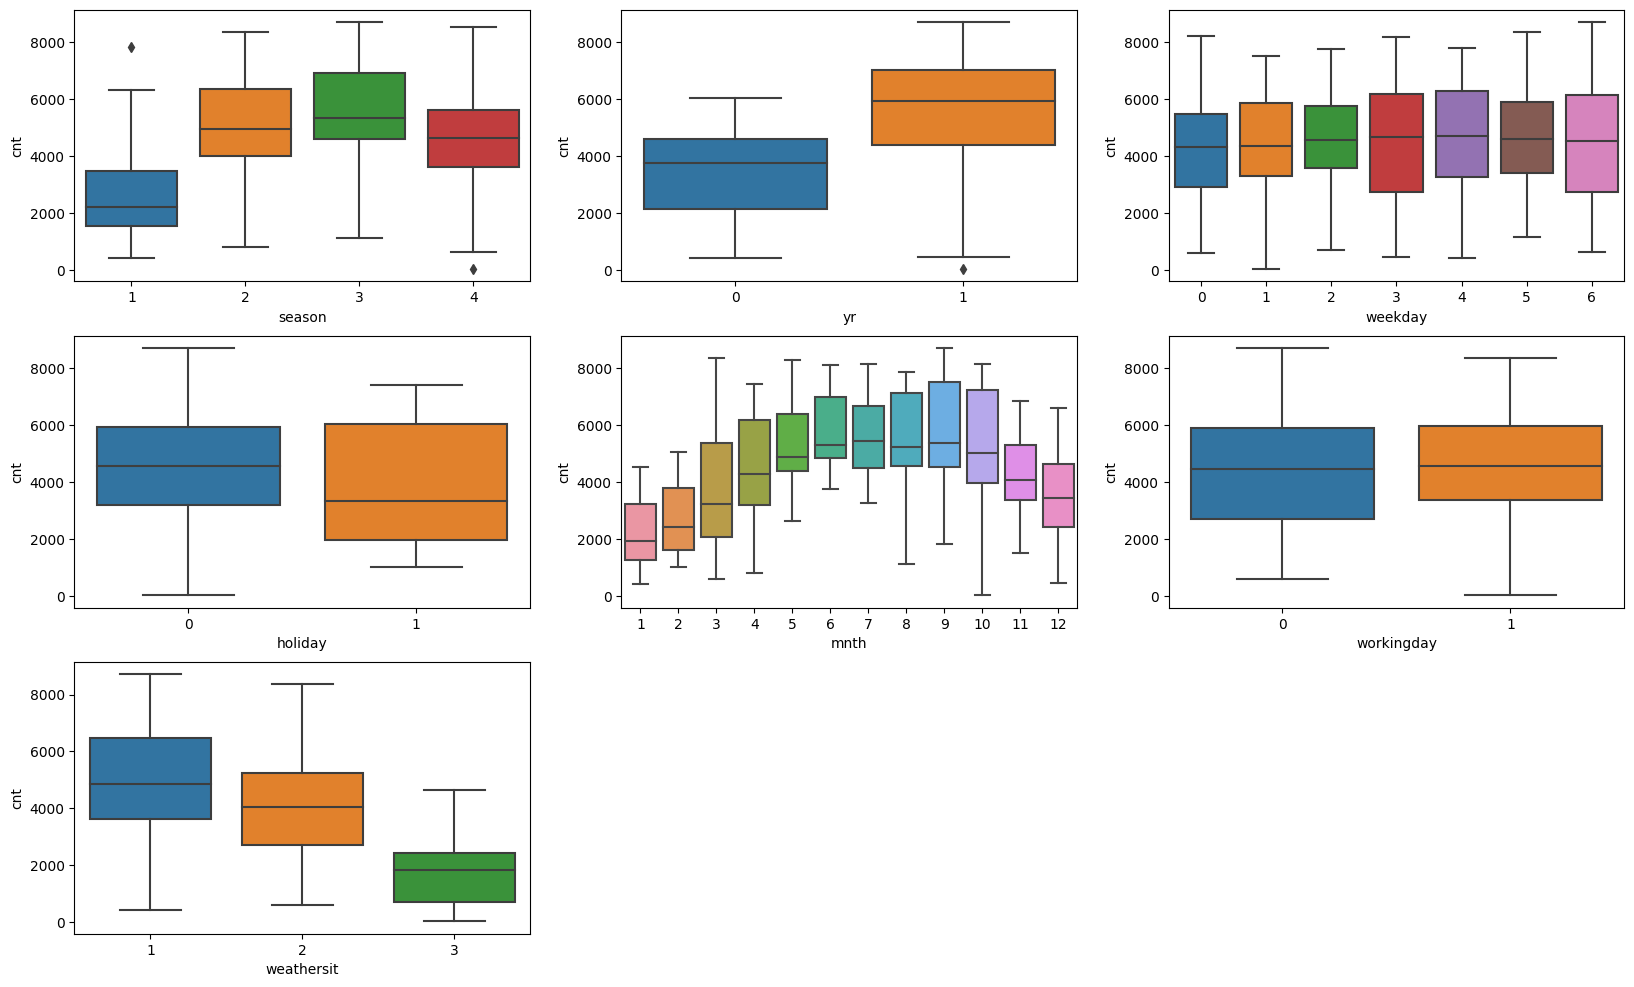

In [8]:
plt.figure(figsize = (20, 12))

plt.subplot(3, 3, 1)
sns.boxplot(x = "season", y = "cnt", data = df)

plt.subplot(3, 3, 2)
sns.boxplot(x = "yr", y = "cnt", data = df)

plt.subplot(3, 3, 3)
sns.boxplot(x = "weekday", y = "cnt", data = df)

plt.subplot(3, 3, 4)
sns.boxplot(x = "holiday", y = "cnt", data = df)

plt.subplot(3, 3, 5)
sns.boxplot(x = "mnth", y ="cnt", data = df)

plt.subplot(3, 3, 6)
sns.boxplot(x = "workingday", y ="cnt", data = df)

plt.subplot(3, 3, 7)
sns.boxplot(x = "weathersit", y ="cnt", data = df)

- "weathersit", "mnth", "holiday", "yr", "season" shows some pattern.

In [9]:
df["weathersit"].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

- Most users rented bike on Clear days followed by Misty days then Light Snow days.
- 1 = Cloudy
- 2 = Misty
- 3 = Light Snow
- 4 = Heavy Snow

In [13]:
df["mnth"].value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [24]:
df_temp = df[["cnt", "mnth"]]
df_temp.shape

(730, 2)

In [27]:
df_temp[df_temp["mnth"] == 1].sum()

cnt     134933
mnth        62
dtype: int64

In [28]:
df_temp[df_temp["mnth"] == 3].sum()

cnt     228920
mnth       186
dtype: int64

In [29]:
df_temp[df_temp["mnth"] == 5].sum()

cnt     331686
mnth       310
dtype: int64

In [30]:
df_temp[df_temp["mnth"] == 7].sum()

cnt     344948
mnth       434
dtype: int64

In [31]:
df_temp[df_temp["mnth"] == 8].sum()

cnt     351194
mnth       496
dtype: int64

In [32]:
df_temp[df_temp["mnth"] == 10].sum()

cnt     322352
mnth       620
dtype: int64

- Most users rented bike in August followed by July then May. 

In [14]:
df["season"].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [33]:
df_temp = df[["season", "cnt"]]

In [34]:
df_temp[df_temp["season"] == 3].sum()

season        564
cnt       1061129
dtype: int64

In [35]:
df_temp[df_temp["season"] == 2].sum()

season       368
cnt       918589
dtype: int64

In [36]:
df_temp[df_temp["season"] == 1].sum()

season       180
cnt       469514
dtype: int64

- Most users rented bike in the "fall" season.

# Data Preparation

In [42]:
def fun(x):
    if x == 1:
        return "Clear"
    elif x == 2:
        return "Cloudy"
    elif x == 3:
        return "Light Rain"
    else:
        return "Heavy Rain"

df["weathersit"] = df["weathersit"].apply(fun)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [43]:
def fun(x):
    if x == 1:
        return "Spring"
    elif x == 2:
        return "Summer"
    elif x == 3:
        return "Fall"
    else:
        return "Winter"
    
df["season"] = df["season"].apply(fun)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,1,0,6,0,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,1,0,0,0,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [44]:
def fun(x):
    if x == 0:
        return "Monday"
    elif x == 1:
        return "Tuesday"
    elif x == 2:
        return "Wednesday"
    elif x == 3:
        return "Thursday"
    elif x == 4:
        return "Friday"
    elif x == 5:
        return "Saturday"
    else:
        return "Sunday"
    
df["weekday"] = df["weekday"].apply(fun)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,1,0,Sunday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,1,0,Monday,0,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,1,0,Tuesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,1,0,Wednesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,1,0,Thursday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [45]:
def fun(x):
    if x == 1:
        return "January"
    elif x == 2:
        return "February"
    elif x == 3:
        return "March"
    elif x == 4:
        return "April"
    elif x == 5:
        return "May"
    elif x == 6:
        return "June"
    elif x == 7:
        return "July"
    elif x == 8:
        return "August"
    elif x == 9:
        return "September"
    elif x == 10:
        return "October"
    elif x == 11:
        return "November"
    else:
        return "December"
    
df["mnth"] = df["mnth"].apply(fun)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,January,0,Sunday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,January,0,Monday,0,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,January,0,Tuesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,January,0,Wednesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,January,0,Thursday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [47]:
df = df.drop(["dteday", "instant", "casual", "registered"],  axis = 1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Sunday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Monday,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Tuesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Wednesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Thursday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [48]:
df.shape

(730, 12)

## Dummy Variables

#### Need to generate dummy variables for the following features -
- "season", "mnth", "weekday", "weathersit"

In [53]:
status = pd.get_dummies(df["season"], drop_first = True)

status.head()

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


- 100 corresponds to Spring
- 010 corresponds to Summer
- 001 corresponds to Winter
- 000 corresonds to Fall

In [54]:
df = pd.concat([df, status], axis = 1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter
0,Spring,0,January,0,Sunday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,Spring,0,January,0,Monday,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,Spring,0,January,0,Tuesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,Spring,0,January,0,Wednesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,Spring,0,January,0,Thursday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [55]:
df = df.drop("season", axis = 1)
df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter
0,0,January,0,Sunday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,January,0,Monday,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,January,0,Tuesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,January,0,Wednesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,January,0,Thursday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [58]:
status = pd.get_dummies(df["weathersit"])
status.head()

,Clear,Cloudy,Light Rain
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


- 010 corresponds to Cloudy
- 100 corresponds to Clear
- 001 corresponds to Light Rain
- 000 corresponds to Heavy Rain

In [59]:
df = pd.concat([df, status], axis = 1)
df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Clear,Cloudy,Light Rain
0,0,January,0,Sunday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1,0
1,0,January,0,Monday,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1,0
2,0,January,0,Tuesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,1,0,0
3,0,January,0,Wednesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,1,0,0
4,0,January,0,Thursday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,1,0,0


In [60]:
df.drop("weathersit", axis = 1, inplace = True)
df.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Clear,Cloudy,Light Rain
0,0,January,0,Sunday,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1,0
1,0,January,0,Monday,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1,0
2,0,January,0,Tuesday,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,1,0,0
3,0,January,0,Wednesday,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,1,0,0
4,0,January,0,Thursday,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,1,0,0


In [62]:
status = pd.get_dummies(df["mnth"], drop_first = True)
status.head()

,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


- 00000000000 corresponds to April.
- 10000000000 corresponds to August.
- 01000000000 corresponds to December.
- 00100000000 corresponds to February.
- 00010000000 corresponds to January.
- 00001000000 corresponds to July.
- 00000100000 corresponds to June.
- 00000010000 corresponds to March.
- 00000001000 corresponds to May.
- 00000000100 corresponds to November.
- 00000000010 corresponds to October.
- 00000000001 corresponds to September.

In [63]:
df = pd.concat([df, status], axis = 1)
df.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,...,December,February,January,July,June,March,May,November,October,September
0,0,January,0,Sunday,0,14.110847,18.18125,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,0,January,0,Monday,0,14.902598,17.68695,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,0,January,0,Tuesday,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,January,0,Wednesday,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,January,0,Thursday,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


In [65]:
df.drop("mnth", axis = 1, inplace = True)
df.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Spring,...,December,February,January,July,June,March,May,November,October,September
0,0,0,Sunday,0,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,Monday,0,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,Tuesday,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,Wednesday,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,Thursday,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,1,0,0,0,0,0,0,0


In [67]:
status = pd.get_dummies(df["weekday"], drop_first = True)
status.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,1,0,0,0
1,1,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0


- 000000 corresponds to Friday.
- 100000 corresponds to Monday.
- 010000 corresponds to Saturday.
- 001000 corresponds to Sunday.
- 000100 corresponds to Thursday.
- 000010 corresponds to Tuesday.
- 000001 corresponds to Wednesday.

In [68]:
df = pd.concat([df, status], axis = 1)
df.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Spring,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,Sunday,0,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,0,0,1,0,0,0
1,0,0,Monday,0,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,1,0,0,0,0,0
2,0,0,Tuesday,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,0,0,0,0,1,0
3,0,0,Wednesday,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,Thursday,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,1,0,0


In [69]:
df.drop("weekday", axis = 1, inplace = True)
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


# Splitting the dataset
#### Train Size = 70% of dataset
#### Test Size = 30% of dataset

In [161]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [92]:
from sklearn.preprocessing import MinMaxScaler

In [93]:
scaler = MinMaxScaler()

In [94]:
num_vars = ["temp", "atemp", "hum", "windspeed", "cnt"]

# Normalising to the numerical variables
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [95]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,1,0,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,0,1,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,1,0,0,0


In [96]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.084314,0.086275,0.086275,0.080392,0.143137,0.127451,0.154902,0.158824,0.150980,0.131373
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.278131,0.281045,0.281045,0.272166,0.350557,0.333805,0.362166,0.365870,0.358381,0.338139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


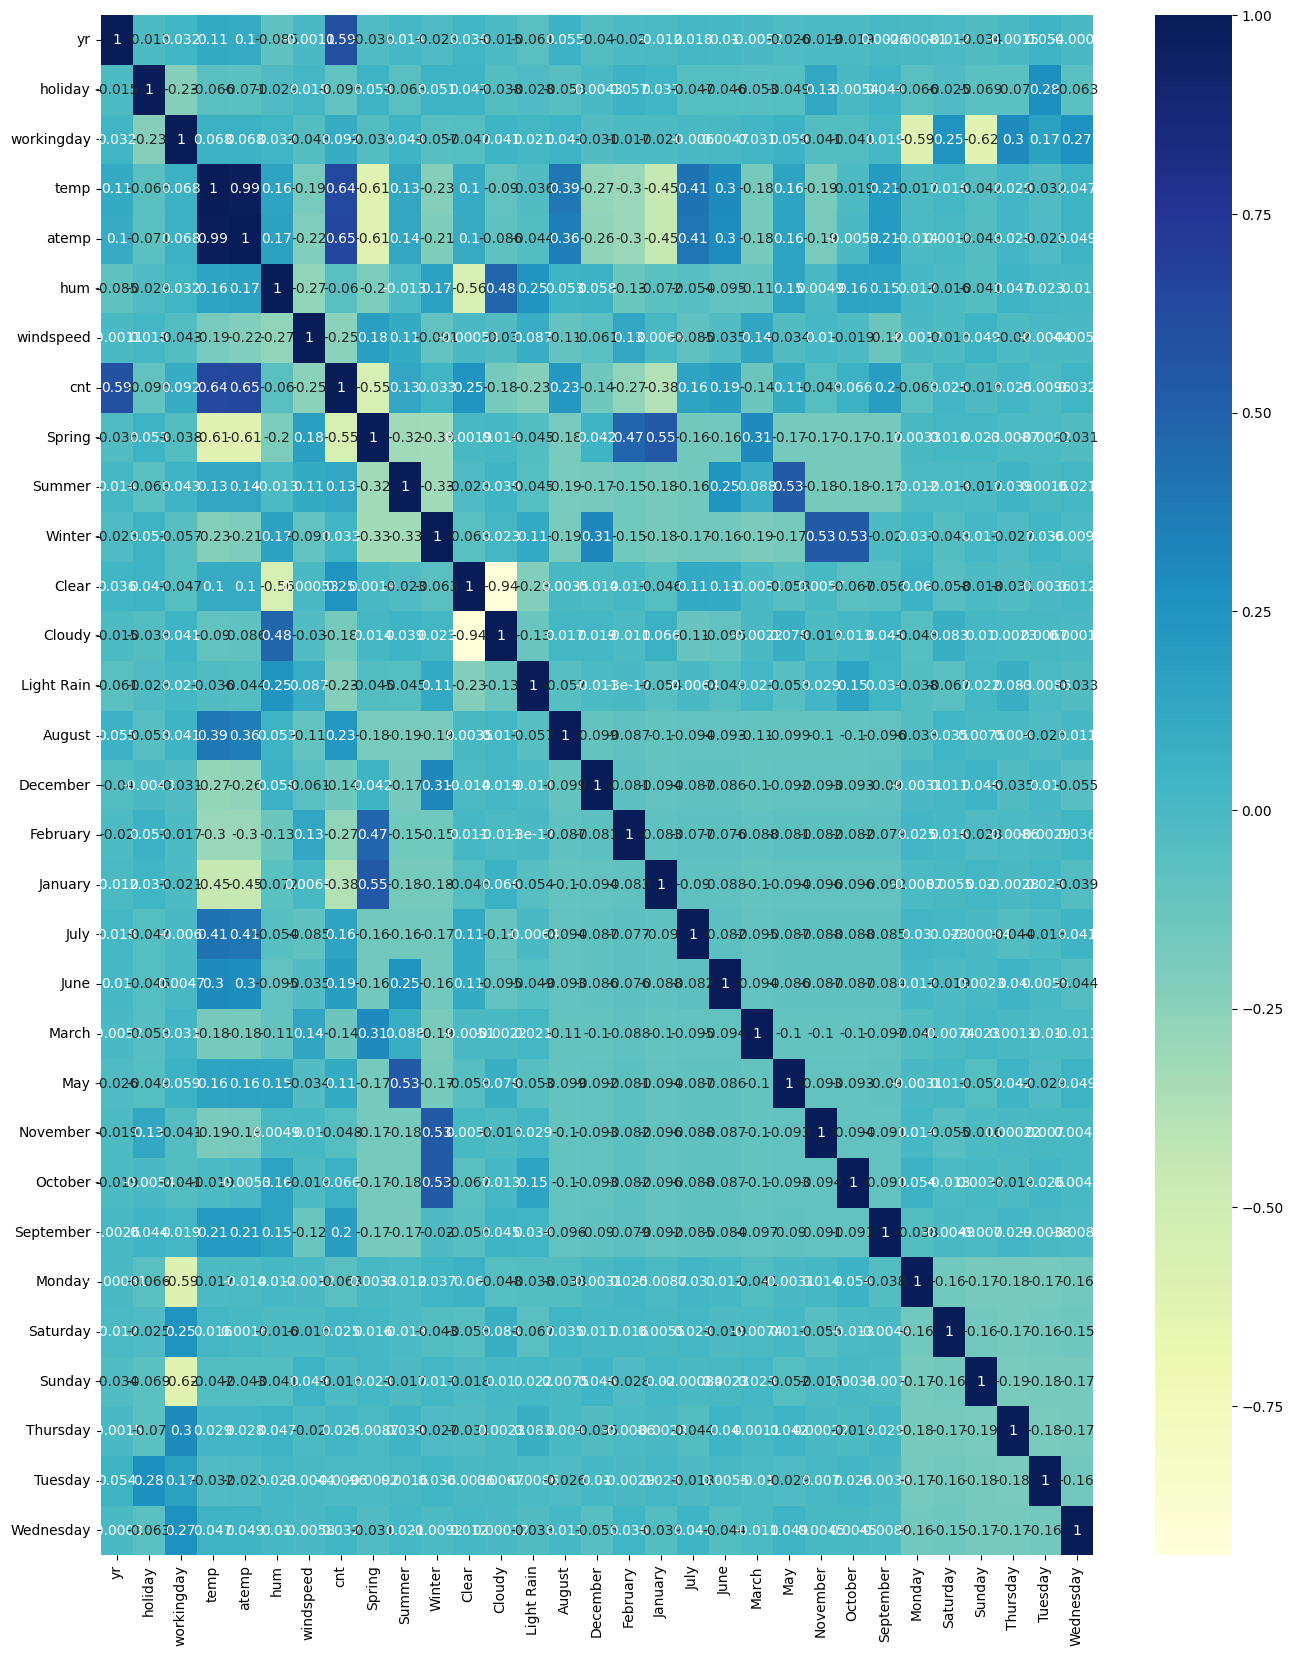

In [97]:
plt.figure(figsize = (16, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

- It seems "atemp" to be correlated with the "cnt" the most.

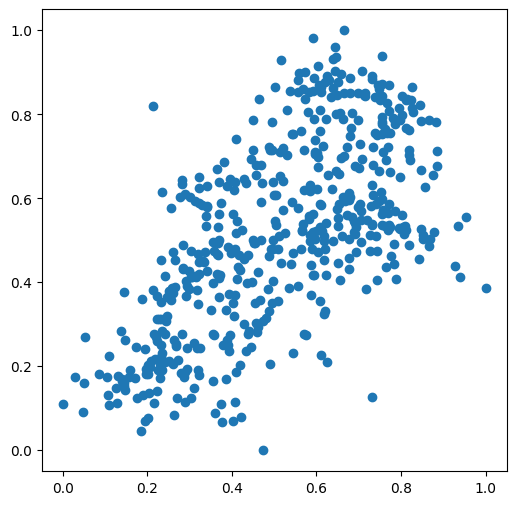

In [98]:
plt.figure(figsize = (6, 6))
plt.scatter(df_train["atemp"], df_train["cnt"])
plt.show()

In [99]:
y_train = df_train.pop("cnt")
X_train = df_train

In [100]:
print(y_train.shape, X_train.shape)

(510,) (510, 30)


In [103]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Spring,Summer,Winter,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,0,0,1,0,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,0,0,1,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [106]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [101]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train[["atemp"]])

lr = sm.OLS(y_train, X_train_sm).fit()

In [102]:
lr.params

const    0.162924
atemp    0.683633
dtype: float64

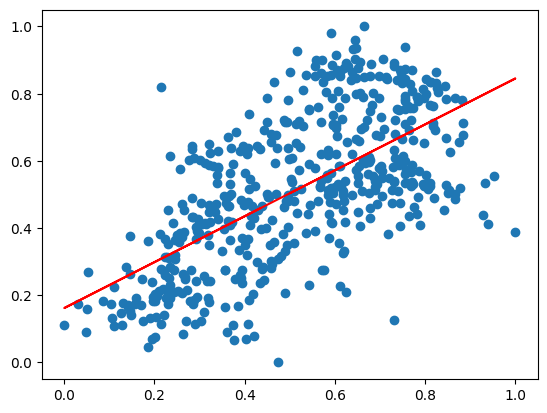

In [107]:
plt.scatter(X_train_sm.iloc[:, 1], y_train)
plt.plot(X_train_sm.iloc[:, 1], 0.162 + 0.683 * X_train_sm.iloc[:, 1], "r")
plt.show()

In [108]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     364.7
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           1.10e-61
Time:                        16:38:58   Log-Likelihood:                 176.51
No. Observations:                 510   AIC:                            -349.0
Df Residuals:                     508   BIC:                            -340.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1629      0.020      8.199      0.000       0.124       0.202
atemp          0.6836      0.036     19.098      0.000       0.613       0.754
==============================================================================
Omnibus:                        3.316   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                2.842
Skew:                           0.090   Prob(JB):                        0.241
Kurtosis:                       2.682   Cond. No.                         6.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- R-squared is approx 42%.
- This model explains the variance upto 42%.

In [109]:
X_train_lm = X_train[["atemp", "temp"]] 

In [110]:
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const    0.163383
atemp    0.492316
temp     0.181818
dtype: float64

In [111]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     182.5
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           1.95e-60
Time:                        16:42:03   Log-Likelihood:                 176.81
No. Observations:                 510   AIC:                            -347.6
Df Residuals:                     507   BIC:                            -334.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1634      0.020      8.215      0.000       0.124       0.202
atemp          0.4923      0.248      1.984      0.048       0.005       0.980
temp           0.1818      0.233      0.779      0.436      -0.277       0.640
==============================================================================
Omnibus:                        4.934   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                3.720
Skew:                           0.079   Prob(JB):                        0.156
Kurtosis:                       2.612   Cond. No.                         56.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Not much increase in R-squared value.
- Also "temp" have a high P-value, so it will be dropped.

In [116]:
X_train_lm = X_train[["atemp", "yr"]]

In [117]:
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const    0.072104
atemp    0.625241
yr       0.237817
dtype: float64

In [118]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     579.5
Date:                Wed, 02 Nov 2022   Prob (F-statistic):          1.07e-131
Time:                        16:44:39   Log-Likelihood:                 341.87
No. Observations:                 510   AIC:                            -677.7
Df Residuals:                     507   BIC:                            -665.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0721      0.015      4.810      0.000       0.043       0.102
atemp          0.6252      0.026     24.001      0.000       0.574       0.676
yr             0.2378      0.011     21.511      0.000       0.216       0.260
==============================================================================
Omnibus:                       38.030   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.520
Skew:                          -0.536   Prob(JB):                     1.96e-13
Kurtosis:                       4.266   Cond. No.                         6.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Significant increase in R-squared value, jumped from 42% to 70%.

In [120]:
X_train_lm = X_train[["atemp", "yr", "Spring"]]

In [121]:
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     482.6
Date:                Wed, 02 Nov 2022   Prob (F-statistic):          5.58e-148
Time:                        16:47:16   Log-Likelihood:                 383.02
No. Observations:                 510   AIC:                            -758.0
Df Residuals:                     506   BIC:                            -741.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1942      0.019     10.238      0.000       0.157       0.231
atemp          0.4506      0.030     14.835      0.000       0.391       0.510
yr             0.2412      0.010     23.607      0.000       0.221       0.261
Spring        -0.1407      0.015     -9.413      0.000      -0.170      -0.111
==============================================================================
Omnibus:                      106.242   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              302.517
Skew:                          -0.998   Prob(JB):                     2.04e-66
Kurtosis:                       6.201   Cond. No.                         9.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Significant increase in R-squared value, jumped from 70% to 74%.

In [124]:
X_train_lm = X_train

In [125]:
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Wed, 02 Nov 2022   Prob (F-statistic):          8.42e-181
Time:                        16:50:51   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1236      0.030      4.181      0.000       0.066       0.182
yr             0.2322      0.008     28.792      0.000       0.216       0.248
holiday       -0.0246      0.023     -1.059      0.290      -0.070       0.021
workingday     0.0617      0.011      5.383      0.000       0.039       0.084
temp           0.4013      0.142      2.821      0.005       0.122       0.681
atemp          0.0506      0.138      0.366      0.714      -0.221       0.322
hum           -0.1518      0.039     -3.940      0.000      -0.228      -0.076
windspeed     -0.1844      0.026     -7.003      0.000      -0.236      -0.133
Spring        -0.0486      0.030     -1.618      0.106      -0.108       0.010
Summer         0.0382      0.026      1.455      0.146      -0.013       0.090
Winter         0.1054      0.028      3.770      0.000       0.050       0.160
Clear          0.1471      0.012     12.739      0.000       0.124       0.170
Cloudy         0.0861      0.013      6.656      0.000       0.061       0.112
Light Rain    -0.1096      0.022     -5.058      0.000      -0.152      -0.067
August         0.0161      0.034      0.473      0.637      -0.051       0.083
December      -0.0456      0.034     -1.356      0.176      -0.112       0.020
February      -0.0322      0.033     -0.978      0.329      -0.097       0.032
January       -0.0626      0.034     -1.864      0.063      -0.129       0.003
July          -0.0393      0.035     -1.116      0.265      -0.108       0.030
June          -0.0017      0.025     -0.067      0.946      -0.051       0.048
March          0.0013      0.025      0.052      0.958      -0.047       0.050
May            0.0247      0.021      1.169      0.243      -0.017       0.066
November      -0.0418      0.036     -1.149      0.251      -0.113       0.030
October        0.0077      0.036      0.215      0.830      -0.063       0.078
September      0.0818      0.032      2.549      0.011       0.019       0.145
Monday         0.0160      0.013      1.209      0.227      -0.010       0.042
Saturday       0.0097      0.016      0.625      0.532      -0.021       0.040
Sunday         0.0705      0.013      5.488      0.000       0.045       0.096
Thursday       0.0040      0.015      0.274      0.784      -0.025       0.033
Tuesday       -0.0118      0.015     -0.777      0.437      -0.041       0.018
Wednesday     -0.0096      0.015     -0.620      0.535      -0.040       0.021
==============================================================================
Omnibus:                       85.143   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.880
Skew:                          -0.809   Prob(JB):                     2.21e-52
Kurtosis:                       5.929   Cond. No.                     1.18e+16
==

In [126]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [127]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
26,Sunday,inf
2,workingday,inf
24,Monday,inf
1,holiday,inf
10,Clear,inf
11,Cloudy,inf
12,Light Rain,inf
3,temp,67.12
4,atemp,56.09
7,Spring,10.80


- Some features have very high variance so they will be dropped.

In [128]:
X_train = X_train.drop(["Sunday", "workingday", "Monday", "Clear", "Cloudy", "Clear", "Light Rain", "temp"], axis = 1)

In [129]:
X_train_lm = X_train

In [130]:
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     94.39
Date:                Wed, 02 Nov 2022   Prob (F-statistic):          7.70e-163
Time:                        16:54:22   Log-Likelihood:                 471.69
No. Observations:                 510   AIC:                            -895.4
Df Residuals:                     486   BIC:                            -793.8
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3963      0.047      8.411      0.000       0.304       0.489
yr             0.2323      0.009     26.077      0.000       0.215       0.250
holiday       -0.0673      0.029     -2.284      0.023      -0.125      -0.009
atemp          0.5065      0.049     10.367      0.000       0.410       0.602
hum           -0.3519      0.034    -10.454      0.000      -0.418      -0.286
windspeed     -0.2154      0.028     -7.680      0.000      -0.271      -0.160
Spring        -0.0357      0.033     -1.076      0.282      -0.101       0.029
Summer         0.0445      0.029      1.537      0.125      -0.012       0.101
Winter         0.1108      0.031      3.587      0.000       0.050       0.171
August         0.0451      0.037      1.227      0.221      -0.027       0.117
December      -0.0281      0.037     -0.758      0.449      -0.101       0.045
February      -0.0335      0.036     -0.920      0.358      -0.105       0.038
January       -0.0528      0.037     -1.429      0.154      -0.125       0.020
July          -0.0249      0.038     -0.650      0.516      -0.100       0.050
June           0.0150      0.027      0.556      0.578      -0.038       0.068
March          0.0040      0.027      0.147      0.883      -0.049       0.057
May            0.0430      0.023      1.869      0.062      -0.002       0.088
November      -0.0323      0.040     -0.803      0.423      -0.111       0.047
October        0.0050      0.040      0.126      0.900      -0.073       0.083
September      0.0991      0.035      2.798      0.005       0.030       0.169
Saturday       0.0244      0.014      1.750      0.081      -0.003       0.052
Thursday       0.0102      0.013      0.792      0.429      -0.015       0.035
Tuesday       -0.0004      0.014     -0.032      0.975      -0.027       0.026
Wednesday      0.0063      0.014      0.459      0.647      -0.021       0.034
==============================================================================
Omnibus:                      104.079   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              318.244
Skew:                          -0.953   Prob(JB):                     7.84e-70
Kurtosis:                       6.367   Cond. No.                         33.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [131]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,28.87
3,hum,23.64
7,Winter,11.62
5,Spring,11.44
6,Summer,6.49
17,October,6.28
16,November,5.91
8,August,5.30
11,January,5.05
12,July,4.83


In [132]:
X_train = X_train.drop(["Spring", "Summer", "August", "December", "October", "November", "March", "July"], axis = 1)

In [133]:
X_train_lm = X_train

In [135]:
X_train_sm = sm.add_constant(X_train_lm)

lm = sm.OLS(y_train, X_train_sm).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     134.6
Date:                Wed, 02 Nov 2022   Prob (F-statistic):          1.65e-163
Time:                        17:01:54   Log-Likelihood:                 453.30
No. Observations:                 510   AIC:                            -874.6
Df Residuals:                     494   BIC:                            -806.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3758      0.031     11.951      0.000       0.314       0.438
yr             0.2343      0.009     25.748      0.000       0.216       0.252
holiday       -0.0759      0.030     -2.545      0.011      -0.135      -0.017
atemp          0.5356      0.031     17.156      0.000       0.474       0.597
hum           -0.3388      0.034    -10.011      0.000      -0.405      -0.272
windspeed     -0.2068      0.028     -7.301      0.000      -0.262      -0.151
Winter         0.0894      0.013      7.053      0.000       0.065       0.114
February      -0.0696      0.021     -3.329      0.001      -0.111      -0.029
January       -0.0868      0.020     -4.255      0.000      -0.127      -0.047
June           0.0294      0.019      1.577      0.116      -0.007       0.066
May            0.0753      0.017      4.345      0.000       0.041       0.109
September      0.0914      0.017      5.234      0.000       0.057       0.126
Saturday       0.0257      0.014      1.797      0.073      -0.002       0.054
Thursday       0.0123      0.013      0.933      0.351      -0.014       0.038
Tuesday        0.0034      0.014      0.245      0.807      -0.024       0.031
Wednesday      0.0085      0.014      0.599      0.550      -0.019       0.036
==============================================================================
Omnibus:                       91.784   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              265.120
Skew:                          -0.860   Prob(JB):                     2.69e-58
Kurtosis:                       6.086   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [136]:
X_train = X_train.drop(["Thursday", "Tuesday", "Wednesday", "June"], axis = 1)

In [137]:
X_train_lm = X_train

In [138]:
X_train_sm = sm.add_constant(X_train_lm)

lm = sm.OLS(y_train, X_train_sm).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     183.4
Date:                Wed, 02 Nov 2022   Prob (F-statistic):          3.35e-167
Time:                        17:03:58   Log-Likelihood:                 451.48
No. Observations:                 510   AIC:                            -879.0
Df Residuals:                     498   BIC:                            -828.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3797      0.031     12.142      0.000       0.318       0.441
yr             0.2338      0.009     25.779      0.000       0.216       0.252
holiday       -0.0780      0.029     -2.725      0.007      -0.134      -0.022
atemp          0.5490      0.030     18.221      0.000       0.490       0.608
hum           -0.3427      0.034    -10.197      0.000      -0.409      -0.277
windspeed     -0.2080      0.028     -7.349      0.000      -0.264      -0.152
Winter         0.0873      0.013      6.924      0.000       0.063       0.112
February      -0.0696      0.021     -3.336      0.001      -0.111      -0.029
January       -0.0864      0.020     -4.238      0.000      -0.126      -0.046
May            0.0717      0.017      4.202      0.000       0.038       0.105
September      0.0871      0.017      5.065      0.000       0.053       0.121
Saturday       0.0210      0.013      1.560      0.119      -0.005       0.047
==============================================================================
Omnibus:                       95.710   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              275.419
Skew:                          -0.897   Prob(JB):                     1.56e-60
Kurtosis:                       6.121   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [139]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,13.96
2,atemp,9.91
4,windspeed,3.63
0,yr,2.04
5,Winter,1.84
7,January,1.54
6,February,1.30
8,May,1.22
9,September,1.18
10,Saturday,1.14


In [143]:
X_train_lm = X_train.drop(["Saturday"], axis = 1)

In [144]:
X_train_sm = sm.add_constant(X_train_lm)

lm = sm.OLS(y_train, X_train_sm).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     200.9
Date:                Wed, 02 Nov 2022   Prob (F-statistic):          7.71e-168
Time:                        17:08:04   Log-Likelihood:                 450.24
No. Observations:                 510   AIC:                            -878.5
Df Residuals:                     499   BIC:                            -831.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3837      0.031     12.295      0.000       0.322       0.445
yr             0.2336      0.009     25.724      0.000       0.216       0.251
holiday       -0.0790      0.029     -2.758      0.006      -0.135      -0.023
atemp          0.5486      0.030     18.181      0.000       0.489       0.608
hum           -0.3434      0.034    -10.206      0.000      -0.410      -0.277
windspeed     -0.2091      0.028     -7.380      0.000      -0.265      -0.153
Winter         0.0866      0.013      6.862      0.000       0.062       0.111
February      -0.0694      0.021     -3.322      0.001      -0.110      -0.028
January       -0.0866      0.020     -4.241      0.000      -0.127      -0.046
May            0.0718      0.017      4.203      0.000       0.038       0.105
September      0.0870      0.017      5.054      0.000       0.053       0.121
==============================================================================
Omnibus:                       94.548   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              280.327
Skew:                          -0.876   Prob(JB):                     1.34e-61
Kurtosis:                       6.181   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [145]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,13.96
2,atemp,9.91
4,windspeed,3.63
0,yr,2.04
5,Winter,1.84
7,January,1.54
6,February,1.30
8,May,1.22
9,September,1.18
10,Saturday,1.14


In [146]:
lm.params

const        0.383691
yr           0.233608
holiday     -0.078989
atemp        0.548554
hum         -0.343450
windspeed   -0.209111
Winter       0.086588
February    -0.069386
January     -0.086564
May          0.071811
September    0.087024
dtype: float64

In [147]:
y_train_pred = lm.predict(X_train_sm)

/home/himanshu/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

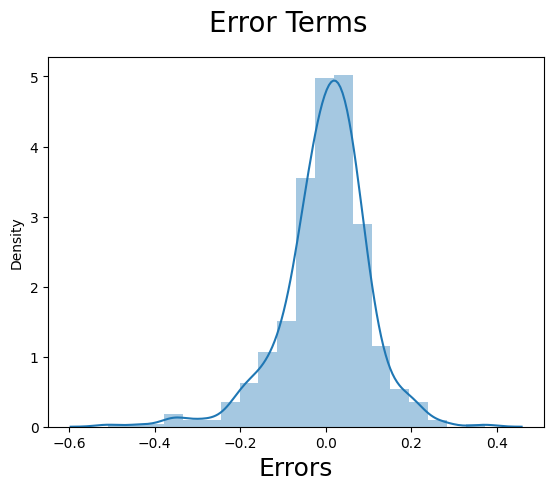

In [148]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

In [162]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,0,0,0,0,0,0,1,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,0,0,1,0,0,0,0,0,0,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,1,...,0,0,0,0,0,0,0,0,0,0


In [163]:
num_vars = ["temp", "atemp", "hum", "windspeed", "cnt"]

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [164]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.086758,0.073059,0.082192,0.086758,0.146119,0.178082,0.118721,0.100457,0.127854,0.164384
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.282125,0.260830,0.275286,0.282125,0.354034,0.383458,0.324202,0.301297,0.334692,0.371472
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [165]:
y_test = df_test.pop("cnt")
X_test = df_test

In [166]:
X_test = X_test[["yr", "holiday", "atemp", "hum", "windspeed", "Winter", "February", "January", "May", "September"]]

In [167]:
X_test_sm = sm.add_constant(X_test)

In [169]:
X_test_sm.head()

,const,yr,holiday,atemp,hum,windspeed,Winter,February,January,May,September
184,1.0,0,1,0.769660,0.657364,0.084219,0,0,0,0,0
535,1.0,1,0,0.842587,0.610133,0.153728,0,0,0,0,0
299,1.0,0,0,0.496145,0.837699,0.334206,1,0,0,0,0
221,1.0,0,0,0.795343,0.437098,0.339570,0,0,0,0,0
152,1.0,0,0,0.741471,0.314298,0.537414,0,0,0,0,0


In [171]:
y_test_pred = lm.predict(X_test_sm)

Text(0, 0.5, 'y_pred')

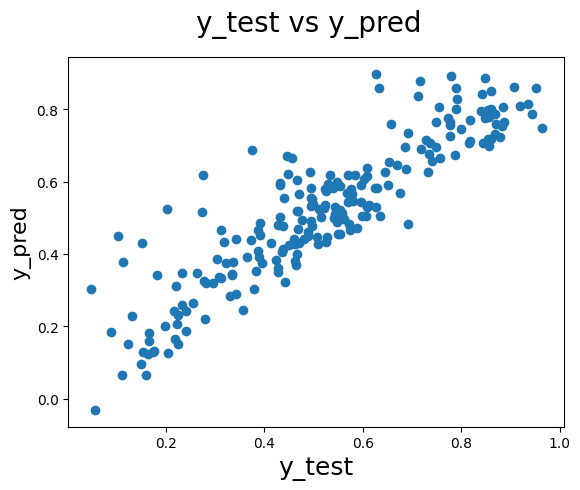

In [172]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

const        0.383691
yr           0.233608
holiday     -0.078989
atemp        0.548554
hum         -0.343450
windspeed   -0.209111
Winter       0.086588
February    -0.069386
January     -0.086564
May          0.071811
September    0.087024

## We can see that the equation of our best fitted line is: 
$ cnt = 0.383 + 0.233 \times yr - 0.078 \times holiday + 0.548 \times atemp - 0.343 \times hum - 0.209 \times windspeed + 0.086 \times Winter - 0.069 \times February - 0.086 \times January + 0.071 \times May + 0.087 \times September $

In [173]:
from sklearn.metrics import r2_score

In [174]:
r2_score(y_true = y_test, y_pred = y_test_pred)

0.7957262184144573

- Train r2_score = 80%
- Test r2_score = 79%
- Model seems to predict values quite good.